## Quantitative Analysis

i.e. here, I perform a quantitative analysis of the training output datasets: are the trained models able to work better (or worse) under certain circumstances?
That is:
- with a certain type of quantifier? (all, exists) (is a certain type of quantifier harder?)
- with a certain number of keys? (generally -> or specifically: with a certain number of predicates? / constants?) (is more keys / predicates / constants harder?)
- with a certain number of constants?
- with a certain number of predicates?
- with a certain size of the world model? (is a bigger world model harder?)
- with a certain number of operators? (is more operators harder?)
- with a certain type of operator? (negation, implication, and-operator) -> especially: is there negation in front of quantifiers or not? // using only no operators vs. unary vs. binary operators // (is a certain type of operator harder (none, unary, binary)? is negation in front of quantifiers harder?)
- etc. (e.g. do the models tend to produce tautologies / contradictions?)

(dazu sowohl Output Datensatz als auch Input Datensatz laden, über id Mappen!!)
=> dann noch: weitere Spalten miteinbeziehen: correctIncorrect vs. Gibberish.

- for evaluation, we chose the datapoints: 80000:81000
- manche der unten stehenden Evals machen gegeben der Task keinen Sinn!! 
    - Task 1: Input:  World Model + Keys + Satisfied => also: macht nur world model count, constants count, keys count, predicates count Sinn. Aber nicht: quantifier, operator count, operator type.
    - Task 2: Input: Formula + Satisfied => also: umgekehrt wie task 1: es macht nur: operator count, operator type, quantifier Sinn, (predicates count). Aber nicht: world model count, constants count, keys count.
    - Task 3: Input: Formula + Keys + World Model => also: macht alles Sinn.


In [3]:
import json
import collections
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
filename = 'orca-13b_trained_on_t3_task3_hard.json' #TODO: change 
output_dataset = pd.read_json('../results/training-hard-eval/' + filename)
filename = 'base_pred_logic_data_hard.json'
base_dataset = pd.read_json('../datasets/' + filename)

In [5]:
output_dataset

,Predictions,References,Correct,Gibberish
0,satisfied</s>,unsatisfied,False,False
1,unsatisfied</s>,unsatisfied,True,False
2,unsatisfied</s>,unsatisfied,True,False
3,satisfied</s>,unsatisfied,False,False
4,unsatisfied</s>,satisfied,False,False
...,...,...,...,...
995,unsatisfied</s>,unsatisfied,True,False
996,unsatisfied</s>,unsatisfied,True,False
997,unsatisfied\n\nExplanation:The formula is unsa...,satisfied,False,False
998,satisfied</s>,satisfied,True,False


In [6]:
# subset:
base_dataset = base_dataset.iloc[0:1000]
len(base_dataset)

1000

In [7]:
base_dataset

,Formula,Predicates,Variables,Operators,Quantifiers,P_mapping,C_mapping,Keys,Names,Adjectives,World Model,Valuation,Satisfied
0,exists y.all x.(-G(x) & -(-F(y) -> -F(y))),"[F, G]","[y, x]","[&, ->, -]","['all', 'exists']","{'F': 'Confident', 'G': 'Bothered'}","{'d': 'Catalina', 'g': 'Ulises', 'n': 'Meredit...",F: Confident. G: Bothered. d: Catalina. g: Uli...,"[Catalina, Ulises, Meredith, Diana, Philip, Ka...","[Confident, Bothered]",Catalina is not Confident. Ulises is not Conf...,"[[d, Catalina], [g, Ulises], [n, Meredith], [f...",unsatisfied
1,-all y.exists x.(-F(y) -> -(F(y) & -F(x))),[F],"[y, x]","[>, &, -]","['all', 'exists']",{'F': 'Conservative'},"{'k': 'Lennox', 'b': 'Evie', 'h': 'Leyla', 'i'...",F: Conservative. k: Lennox. b: Evie. h: Leyla....,"[Lennox, Evie, Leyla, Trent, Andrew, Abdiel, J...",[Conservative],Lennox is not Conservative. Evie is Conservat...,"[[k, Lennox], [b, Evie], [h, Leyla], [i, Trent...",unsatisfied
2,all y.exists x.(F(x) & (-F(y) -> G(y))),"[F, G]","[y, x]","[>, &, -]","['all', 'exists']","{'F': 'Bothered', 'G': 'Selfish'}","{'h': 'Paris', 's': 'Franklin', 'k': 'Gia', 'd...",F: Bothered. G: Selfish. h: Paris. s: Franklin...,"[Paris, Franklin, Gia, Saige, Jaziel, Rocky, E...","[Bothered, Selfish]",Paris is Bothered. Franklin is Bothered. Gia ...,"[[h, Paris], [s, Franklin], [k, Gia], [d, Saig...",unsatisfied
3,-all y.exists x.(-G(x) & -(H(x) & F(y))),"[H, F, G]","[y, x]","[&, -]","['all', 'exists']","{'H': 'Conscientious', 'F': 'Arrogant', 'G': '...","{'b': 'Dulce', 'p': 'Arabella', 'd': 'Bruno', ...",H: Conscientious. F: Arrogant. G: Distraught. ...,"[Dulce, Arabella, Bruno, Nathanael, Giana, Adl...","[Conscientious, Arrogant, Distraught]",Dulce is Conscientious. Arabella is Conscient...,"[[b, Dulce], [p, Arabella], [d, Bruno], [q, Na...",unsatisfied
4,-exists y.all x.(-(H(x) -> -F(y)) & -G(x)),"[H, F, G]","[y, x]","[&, ->, -]","['all', 'exists']","{'H': 'Antagonistic', 'F': 'Joyful', 'G': 'Zea...","{'a': 'Tadeo', 'o': 'Braden', 'j': 'Jacqueline...",H: Antagonistic. F: Joyful. G: Zealous. a: Tad...,"[Tadeo, Braden, Jacqueline, Audrey, Emma]","[Antagonistic, Joyful, Zealous]",Tadeo is Antagonistic. Braden is Antagonistic...,"[[a, Tadeo], [o, Braden], [j, Jacqueline], [d,...",satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,exists y.all x.-(H(y) -> -(-G(x) -> F(y))),"[H, F, G]","[y, x]","[->, -]","['all', 'exists']","{'H': 'Panicky', 'F': 'Quarrelsome', 'G': 'Sco...","{'o': 'Ailani', 'q': 'Nova', 'r': 'Peter', 'l'...",H: Panicky. F: Quarrelsome. G: Scornful. o: Ai...,"[Ailani, Nova, Peter, Trevor, Alexandra, Adley...","[Panicky, Quarrelsome, Scornful]",Ailani is not Panicky. Nova is not Panicky. P...,"[[o, Ailani], [q, Nova], [r, Peter], [l, Trevo...",unsatisfied
996,-exists y.all x.-(-(F(x) & -G(y)) & -H(y)),"[H, F, G]","[y, x]","[&, -]","['all', 'exists']","{'H': 'Accepting', 'F': 'Joyful', 'G': 'Consci...","{'q': 'Damon', 'a': 'Imani', 'i': 'Jaime', 'd'...",H: Accepting. F: Joyful. G: Conscientious. q: ...,"[Damon, Imani, Jaime, Colin, Amaya]","[Accepting, Joyful, Conscientious]",Damon is Accepting. Imani is not Accepting. J...,"[[q, Damon], [a, Imani], [i, Jaime], [d, Colin...",unsatisfied
997,all y.exists x.(-F(y) -> (F(x) -> H(x))),"[H, F]","[y, x]","[>, -]","['all', 'exists']","{'H': 'Bitter', 'F': 'Passionate'}","{'q': 'Enrique', 's': 'Aviana'}",H: Bitter. F: Passionate. q: Enrique. s: Aviana.,"[Enrique, Aviana]","[Bitter, Passionate]",Enrique is Bitter. Aviana is Bitter. Enrique ...,"[[q, Enrique], [s, Aviana], [H, [q]], [H, [s]]...",satisfied
998,exists y.all x.(G(y) -> -(F(x) -> H(y))),"[H, F, G]","[y, x]","[>, ->, -]","['all', 'exists']","{'H': 'Scornful', 'F': 'Confident', 'G': 'Dist...","{'g': 'Max', 'i': 'Maximilian', 'd': 'Katalina...",H: Scornful. F: Confident. G: Distracted. g: M...,"[Max, Maximilian, Katalina, Cayden, Vincenzo, ...","[Scornful, Confident, Distracted]",Max is Scornful. Maximilian is not Scornful. ...,"[[g, Max], [i, Maximilian], [d, Katalina

#### Descriptive Statistics

In [8]:
satCounts = base_dataset['Satisfied'].value_counts()
satCounts

Satisfied
unsatisfied    504
satisfied      496
Name: count, dtype: int64

In [9]:
# First: show descriptive statistics of evaluation dataset:
# number of quantifiers: all, exists
quantifiersCounts = base_dataset['Quantifiers'].value_counts()
quantifiersCounts


Quantifiers
['all', 'exists']    1000
Name: count, dtype: int64

In [10]:
# distribution of predicates
predicatesCounts = base_dataset['Predicates'].value_counts() # then add the singular F and G to one line
predicatesCounts

Predicates
[F, G]       231
[H, G]       231
[H, F, G]    220
[H, F]       210
[G]           43
[F]           36
[H]           29
Name: count, dtype: int64

In [11]:
# distribution of constants 
oldConstants = base_dataset['Names']
constants = []
for con in oldConstants:
    constants.append(len(con))
constantsCounts = collections.Counter(constants) # the keys() is what is counted, and the values() is the count
constantsCounts

Counter({10: 135,
         7: 109,
         9: 116,
         5: 97,
         1: 30,
         8: 126,
         3: 89,
         6: 123,
         2: 75,
         4: 100})

<Axes: xlabel='Number_of_constants'>

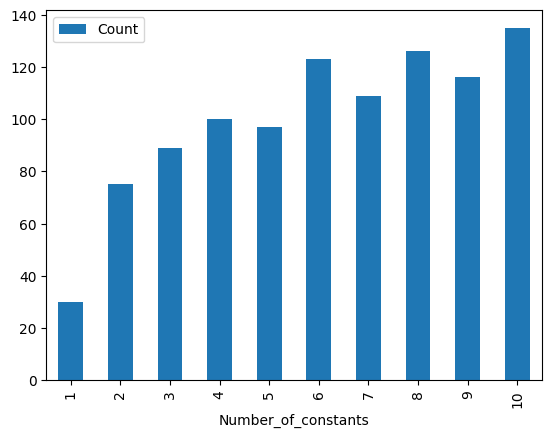

In [12]:
temp = pd.DataFrame(list(zip(constantsCounts.keys(), constantsCounts.values())), columns=['Number_of_constants','Count']).sort_values('Number_of_constants')
temp.plot(kind="bar", x = "Number_of_constants")

In [13]:
# distribution of keys
keys_list = base_dataset['Keys']
keysTemp = []
for keys in keys_list:
    keysTemp.append(keys.count(':'))
keysCounts = collections.Counter(keysTemp)
keysCounts

Counter({12: 112,
         11: 125,
         9: 113,
         8: 116,
         3: 34,
         7: 94,
         10: 122,
         5: 92,
         2: 7,
         13: 33,
         4: 56,
         6: 96})

<Axes: xlabel='Number_of_keys'>

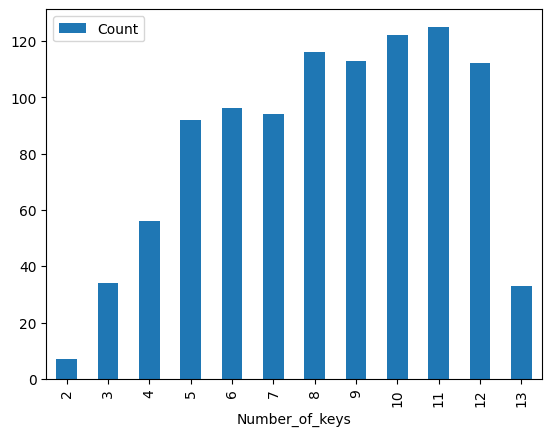

In [14]:
temp = pd.DataFrame(list(zip(keysCounts.keys(), keysCounts.values())), columns=['Number_of_keys','Count']).sort_values('Number_of_keys')
temp.plot(kind="bar", x = "Number_of_keys")

In [15]:
# distribution of world model size
worldModel_list = base_dataset['World Model']
wmTemp = []
for wm in worldModel_list:
    wmTemp.append(wm.count('.'))
worldModelCounts = collections.Counter(wmTemp)
worldModelCounts

Counter({20: 83,
         10: 88,
         14: 72,
         27: 29,
         15: 23,
         2: 34,
         18: 104,
         16: 83,
         24: 30,
         6: 90,
         1: 7,
         30: 33,
         12: 98,
         3: 9,
         4: 60,
         21: 28,
         8: 86,
         7: 9,
         9: 29,
         5: 5})

<Axes: xlabel='Number_of_Sentences'>

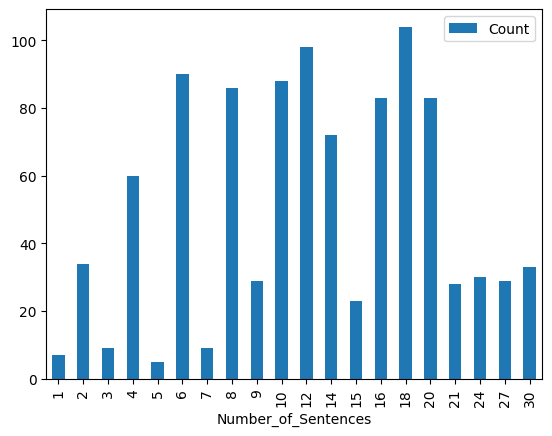

In [16]:
temp = pd.DataFrame(list(zip(worldModelCounts.keys(), worldModelCounts.values())), columns=['Number_of_Sentences','Count']).sort_values('Number_of_Sentences')
temp.plot(kind="bar", x = "Number_of_Sentences")

In [17]:
# generally: count all negations, implications, and-operators individually for each formula (string-find-count).
# from this deduce another list: total number of operators => plot this count. (is more operators harder?)
numNegations = []
numImplications = []
numAnds = []

formula_list = base_dataset['Formula']
for formula in formula_list:
    numNegations.append(formula.count("-"))
    numImplications.append(formula.count(">"))
    numAnds.append(formula.count("&"))

numTotalOperators = [a + b + c for (a, b, c) in zip(numNegations,numImplications,numAnds)]

In [18]:
negationCounts = collections.Counter(numNegations)
negationCounts

Counter({5: 225, 2: 107, 3: 223, 1: 25, 6: 104, 4: 273, 7: 34, 0: 6, 8: 3})

<Axes: xlabel='Number_of_Negations'>

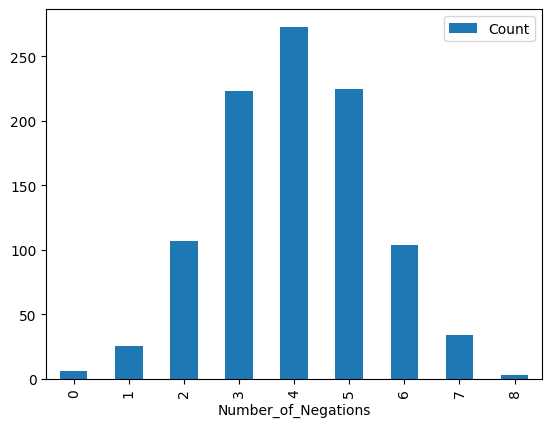

In [19]:
temp = pd.DataFrame(list(zip(negationCounts.keys(), negationCounts.values())), columns=['Number_of_Negations','Count']).sort_values('Number_of_Negations')
temp.plot(kind="bar", x = "Number_of_Negations")

In [20]:
implicationCounts = collections.Counter(numImplications)
implicationCounts

Counter({1: 533, 0: 255, 2: 212})

In [21]:
andCounts = collections.Counter(numAnds)
andCounts

Counter({1: 531, 2: 252, 0: 217})

In [22]:
totalOperatorCounts = collections.Counter(numTotalOperators)
totalOperatorCounts

Counter({7: 224, 4: 109, 5: 220, 3: 27, 8: 104, 6: 273, 9: 34, 2: 6, 10: 3})

<Axes: xlabel='Number_of_Operators'>

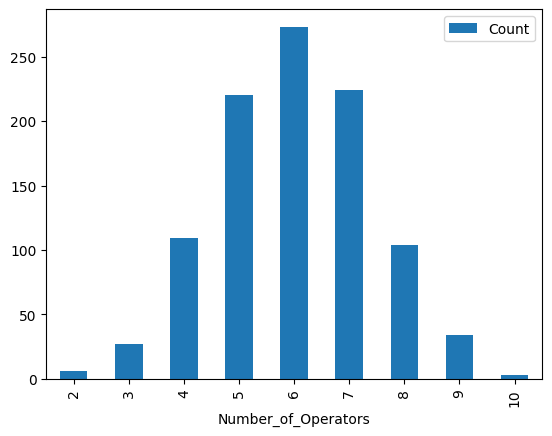

In [23]:
temp = pd.DataFrame(list(zip(totalOperatorCounts.keys(), totalOperatorCounts.values())), columns=['Number_of_Operators','Count']).sort_values('Number_of_Operators')
temp.plot(kind="bar", x = "Number_of_Operators")

In [24]:
# (is a certain type of operator harder (none, unary, binary, unary + binary)?
# none is in totalOperatorCounts 
# noOperators = [True if x == 0 else False for x in totalOperatorCounts]
# <- this is not really needed, see above.

In [25]:
# how many times there is negation in front of quantifiers vs. not (is negation in front of quantifiers harder?)
numNegationInFront = []
for formula in formula_list:
    if formula[0] == "-":
        numNegationInFront.append(True)
    else:
        numNegationInFront.append(False)
negationInFrontCounts = collections.Counter(numNegationInFront)
negationInFrontCounts

Counter({False: 499, True: 501})

In [26]:
# unary is negationCounts > 0 und implicationCounts == 0 und andCounts == 0.
# binary is negationCounts == 0 und implicationCounts > 0 oder andCounts > 0.
# unary + binary == 
unaryOperators = []
binaryOperators = []
unaryBinaryOperators = []
for nega, impl, andop in zip(numNegations, numImplications, numAnds):
    if nega > 0:
        binaryOperators.append(False)
        if impl == 0 and andop == 0:
            unaryOperators.append(True)
            unaryBinaryOperators.append(False)
        else:
            unaryOperators.append(False)
            unaryBinaryOperators.append(True)
    else:
        binaryOperators.append(True)
        unaryBinaryOperators.append(False)
        unaryOperators.append(False)

In [27]:
unaryOperatorsCounts = collections.Counter(unaryOperators)
unaryOperatorsCounts

Counter({False: 1000})

In [28]:
binaryOperatorsCounts = collections.Counter(binaryOperators)
binaryOperatorsCounts

Counter({False: 994, True: 6})

In [29]:
unaryBinaryOperatorsCounts = collections.Counter(unaryBinaryOperators)
unaryBinaryOperatorsCounts

Counter({True: 994, False: 6})

#### Dataset specific statistics

assume, we have two more columns in the output dataset: Correct (True / False), Gibberish (True / False).

But for now, just create bar charts for IncorrectCorrect.


In [30]:
output_dataset.head()

,Predictions,References,Correct,Gibberish
0,satisfied</s>,unsatisfied,False,False
1,unsatisfied</s>,unsatisfied,True,False
2,unsatisfied</s>,unsatisfied,True,False
3,satisfied</s>,unsatisfied,False,False
4,unsatisfied</s>,satisfied,False,False


In [31]:
s = pd.Series([i for i in range(0, 1000, 1)])
base_dataset.set_index([s])
base_dataset.head()

,Formula,Predicates,Variables,Operators,Quantifiers,P_mapping,C_mapping,Keys,Names,Adjectives,World Model,Valuation,Satisfied
0,exists y.all x.(-G(x) & -(-F(y) -> -F(y))),"[F, G]","[y, x]","[&, ->, -]","['all', 'exists']","{'F': 'Confident', 'G': 'Bothered'}","{'d': 'Catalina', 'g': 'Ulises', 'n': 'Meredit...",F: Confident. G: Bothered. d: Catalina. g: Uli...,"[Catalina, Ulises, Meredith, Diana, Philip, Ka...","[Confident, Bothered]",Catalina is not Confident. Ulises is not Conf...,"[[d, Catalina], [g, Ulises], [n, Meredith], [f...",unsatisfied
1,-all y.exists x.(-F(y) -> -(F(y) & -F(x))),[F],"[y, x]","[>, &, -]","['all', 'exists']",{'F': 'Conservative'},"{'k': 'Lennox', 'b': 'Evie', 'h': 'Leyla', 'i'...",F: Conservative. k: Lennox. b: Evie. h: Leyla....,"[Lennox, Evie, Leyla, Trent, Andrew, Abdiel, J...",[Conservative],Lennox is not Conservative. Evie is Conservat...,"[[k, Lennox], [b, Evie], [h, Leyla], [i, Trent...",unsatisfied
2,all y.exists x.(F(x) & (-F(y) -> G(y))),"[F, G]","[y, x]","[>, &, -]","['all', 'exists']","{'F': 'Bothered', 'G': 'Selfish'}","{'h': 'Paris', 's': 'Franklin', 'k': 'Gia', 'd...",F: Bothered. G: Selfish. h: Paris. s: Franklin...,"[Paris, Franklin, Gia, Saige, Jaziel, Rocky, E...","[Bothered, Selfish]",Paris is Bothered. Franklin is Bothered. Gia ...,"[[h, Paris], [s, Franklin], [k, Gia], [d, Saig...",unsatisfied
3,-all y.exists x.(-G(x) & -(H(x) & F(y))),"[H, F, G]","[y, x]","[&, -]","['all', 'exists']","{'H': 'Conscientious', 'F': 'Arrogant', 'G': '...","{'b': 'Dulce', 'p': 'Arabella', 'd': 'Bruno', ...",H: Conscientious. F: Arrogant. G: Distraught. ...,"[Dulce, Arabella, Bruno, Nathanael, Giana, Adl...","[Conscientious, Arrogant, Distraught]",Dulce is Conscientious. Arabella is Conscient...,"[[b, Dulce], [p, Arabella], [d, Bruno], [q, Na...",unsatisfied
4,-exists y.all x.(-(H(x) -> -F(y)) & -G(x)),"[H, F, G]","[y, x]","[&, ->, -]","['all', 'exists']","{'H': 'Antagonistic', 'F': 'Joyful', 'G': 'Zea...","{'a': 'Tadeo', 'o': 'Braden', 'j': 'Jacqueline...",H: Antagonistic. F: Joyful. G: Zealous. a: Tad...,"[Tadeo, Braden, Jacqueline, Audrey, Emma]","[Antagonistic, Joyful, Zealous]",Tadeo is Antagonistic. Braden is Antagonistic...,"[[a, Tadeo], [o, Braden], [j, Jacqueline], [d,...",satisfied


In [32]:
# - with a certain type of quantifier? (all, exists)
temp_df = pd.concat([output_dataset['Correct'], base_dataset['Quantifiers']], axis=1)
temp_df.head()

,Correct,Quantifiers
0,False,"['all', 'exists']"
1,True,"['all', 'exists']"
2,True,"['all', 'exists']"
3,False,"['all', 'exists']"
4,False,"['all', 'exists']"


In [33]:
quantifierCounts = temp_df.groupby(['Correct', 'Quantifiers']).size()
quantifierCounts

Correct  Quantifiers      
False    ['all', 'exists']    446
True     ['all', 'exists']    554
dtype: int64

In [34]:
keyCounts_df = pd.DataFrame()
keyCounts_df["keyCounts"] = pd.DataFrame(keysTemp)
keyCounts_df = keyCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
keyCounts_df["Correct"] = output_dataset['Correct']
keyCounts_df

,keyCounts,Correct
0,12,False
1,11,True
2,9,True
3,12,False
4,8,False
...,...,...
995,13,True
996,8,True
997,4,False
998,13,True


In [35]:
keyCounts = keyCounts_df.groupby(['Correct', 'keyCounts']).size()
keyCounts

Correct  keyCounts
False    2             4
         3            17
         4            24
         5            45
         6            50
         7            45
         8            51
         9            41
         10           48
         11           52
         12           53
         13           16
True     2             3
         3            17
         4            32
         5            47
         6            46
         7            49
         8            65
         9            72
         10           74
         11           73
         12           59
         13           17
dtype: int64

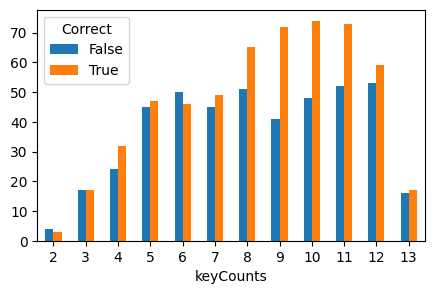

In [36]:
dfp = keyCounts_df.pivot_table(index='keyCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()


In [37]:
# - with a certain number of constants?
constantsCounts_df = pd.DataFrame()
constantsCounts_df["constantCounts"] = pd.DataFrame(constants)
constantsCounts_df = constantsCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
constantsCounts_df["Correct"] = output_dataset['Correct']
constantsCounts_df

,constantCounts,Correct
0,10,False
1,10,True
2,7,True
3,9,False
4,5,False
...,...,...
995,10,True
996,5,True
997,2,False
998,10,True


In [38]:
constantCounts = constantsCounts_df.groupby(['Correct', 'constantCounts']).size()
constantCounts

Correct  constantCounts
False    1                 15
         2                 34
         3                 46
         4                 52
         5                 43
         6                 51
         7                 40
         8                 49
         9                 55
         10                61
True     1                 15
         2                 41
         3                 43
         4                 48
         5                 54
         6                 72
         7                 69
         8                 77
         9                 61
         10                74
dtype: int64

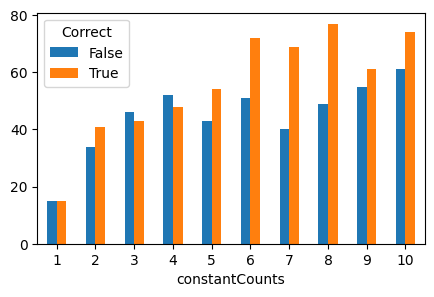

In [39]:
dfp = constantsCounts_df.pivot_table(index='constantCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [40]:
# - with a certain number of predicates?

In [41]:
oldpredicates = base_dataset['Predicates']
predicates = []
for pred in oldpredicates:
    predicates.append(len(pred))

predicatesCounts_df = pd.DataFrame()
predicatesCounts_df["predicatesCounts"] = pd.DataFrame(predicates)
predicatesCounts_df = predicatesCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
predicatesCounts_df["Correct"] = output_dataset['Correct']
predicatesCounts_df

predicatesCounts = predicatesCounts_df.groupby(['Correct', 'predicatesCounts']).size()
predicatesCounts

Correct  predicatesCounts
False    1                    46
         2                   305
         3                    95
True     1                    62
         2                   367
         3                   125
dtype: int64

In [42]:
43/629

0.06836248012718601

In [43]:
17/203

0.08374384236453201

FIRST LEARNING: MORE PREDICATES IS HARDER!! 

In [44]:
# - with a certain size of the world model?
wmCounts_df = pd.DataFrame()
wmCounts_df["WorldModelCounts"] = pd.DataFrame(wmTemp)
wmCounts_df = wmCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
wmCounts_df["Correct"] = output_dataset['Correct']
wmCounts_df

,WorldModelCounts,Correct
0,20,False
1,10,True
2,14,True
3,27,False
4,15,False
...,...,...
995,30,True
996,15,True
997,4,False
998,30,True


In [45]:
wmCounts = wmCounts_df.groupby(['Correct', 'WorldModelCounts']).size()
wmCounts

Correct  WorldModelCounts
False    1                    4
         2                   17
         3                    5
         4                   24
         5                    2
         6                   44
         7                    5
         8                   44
         9                   14
         10                  37
         12                  46
         14                  25
         15                   9
         16                  34
         18                  48
         20                  40
         21                  10
         24                   9
         27                  13
         30                  16
True     1                    3
         2                   17
         3                    4
         4                   36
         5                    3
         6                   46
         7                    4
         8                   42
         9                   15
         10                  51
         12   

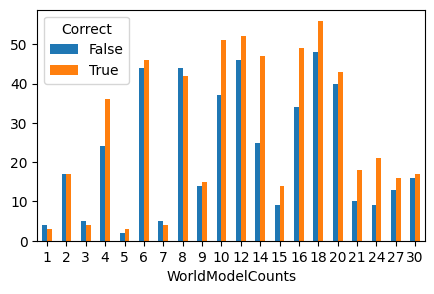

In [46]:
dfp = wmCounts_df.pivot_table(index='WorldModelCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

World model size does not seem to make a difference! -> but plot a regression or something.

In [47]:
# - with a certain number of operators? 
operatorCounts_df = pd.DataFrame()
operatorCounts_df["operatorCounts"] = pd.DataFrame(numTotalOperators)
operatorCounts_df = operatorCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
operatorCounts_df["Correct"] = output_dataset['Correct']
operatorCounts_df

,operatorCounts,Correct
0,7,False
1,7,True
2,4,True
3,5,False
4,7,False
...,...,...
995,7,True
996,7,True
997,5,False
998,5,True


In [48]:
operatorCounts = operatorCounts_df.groupby(['Correct', 'operatorCounts']).size()
operatorCounts

Correct  operatorCounts
False    2                   2
         3                   7
         4                  45
         5                  99
         6                 128
         7                 109
         8                  43
         9                  12
         10                  1
True     2                   4
         3                  20
         4                  64
         5                 121
         6                 145
         7                 115
         8                  61
         9                  22
         10                  2
dtype: int64

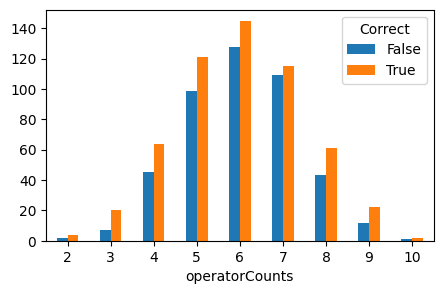

In [49]:
dfp = operatorCounts_df.pivot_table(index='operatorCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [50]:
# - with a certain type of operator? (negation, implication, and-operator) 
# negation
negationCounts_df = pd.DataFrame()
negationCounts_df["negationCounts"] = pd.DataFrame(numNegations)
negationCounts_df = negationCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
negationCounts_df["Correct"] = output_dataset['Correct']
negationCounts_df

,negationCounts,Correct
0,5,False
1,5,True
2,2,True
3,3,False
4,5,False
...,...,...
995,5,True
996,5,True
997,3,False
998,3,True


In [51]:
negationCounts = negationCounts_df.groupby(['Correct', 'negationCounts']).size()
negationCounts

Correct  negationCounts
False    0                   2
         1                   7
         2                  44
         3                 100
         4                 128
         5                 109
         6                  43
         7                  12
         8                   1
True     0                   4
         1                  18
         2                  63
         3                 123
         4                 145
         5                 116
         6                  61
         7                  22
         8                   2
dtype: int64

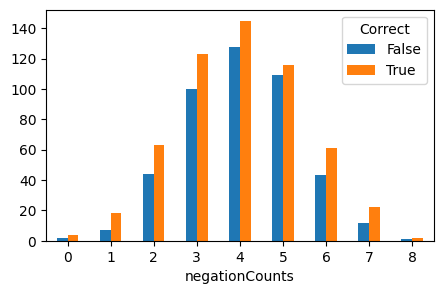

In [52]:
dfp = negationCounts_df.pivot_table(index='negationCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [53]:
# implication
implicationCounts_df = pd.DataFrame()
implicationCounts_df["implicationCounts"] = pd.DataFrame(numImplications)
implicationCounts_df = implicationCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
implicationCounts_df["Correct"] = output_dataset['Correct']
implicationCounts_df

,implicationCounts,Correct
0,1,False
1,1,True
2,1,True
3,0,False
4,1,False
...,...,...
995,2,True
996,0,True
997,2,False
998,2,True


In [54]:
implicationCounts = implicationCounts_df.groupby(['Correct', 'implicationCounts']).size()
implicationCounts

Correct  implicationCounts
False    0                    117
         1                    239
         2                     90
True     0                    138
         1                    294
         2                    122
dtype: int64

In [55]:
184/348

0.5287356321839081

In [54]:
141/327

0.43119266055045874

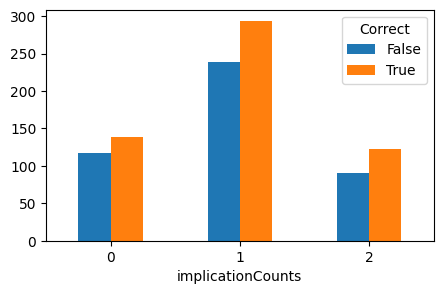

In [56]:
dfp = implicationCounts_df.pivot_table(index='implicationCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [57]:
# and-operator
andOpCounts_df = pd.DataFrame()
andOpCounts_df["andOpCounts"] = pd.DataFrame(numAnds)
andOpCounts_df = andOpCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
andOpCounts_df["Correct"] = output_dataset['Correct']
andOpCounts_df

,andOpCounts,Correct
0,1,False
1,1,True
2,1,True
3,2,False
4,1,False
...,...,...
995,0,True
996,2,True
997,0,False
998,0,True


In [58]:
andOpCounts = andOpCounts_df.groupby(['Correct', 'andOpCounts']).size()
andOpCounts

Correct  andOpCounts
False    0               90
         1              240
         2              116
True     0              127
         1              291
         2              136
dtype: int64

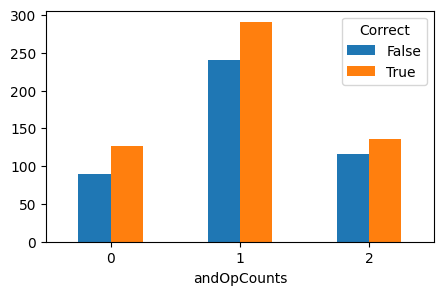

In [59]:
dfp = andOpCounts_df.pivot_table(index='andOpCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [60]:
def get_frequencies(output_dataset, count_list, column_name):
    temp_df = pd.DataFrame()
    temp_df[column_name] = pd.DataFrame(count_list)
    temp_df = temp_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
    temp_df["Correct"] = output_dataset['Correct']
    return temp_df.groupby(['Correct', column_name]).size()

In [61]:
# -> especially: is there negation in front of quantifiers or not? 
get_frequencies(output_dataset, numNegationInFront, "NegationInFront")


Correct  NegationInFront
False    False              217
         True               229
True     False              282
         True               272
dtype: int64

In [62]:
#  using only no operators vs. unary vs. binary operators // 
get_frequencies(output_dataset, unaryOperators, "UnaryOperator")

Correct  UnaryOperator
False    False            446
True     False            554
dtype: int64

In [63]:
get_frequencies(output_dataset, binaryOperators, "BinaryOperator")


Correct  BinaryOperator
False    False             444
         True                2
True     False             550
         True                4
dtype: int64

In [64]:
get_frequencies(output_dataset, unaryBinaryOperators, "UnaryAndBinaryOperators")


Correct  UnaryAndBinaryOperators
False    False                        2
         True                       444
True     False                        4
         True                       550
dtype: int64

We need to look here at the relative frequencies: it tends to be about 5% ratio or 10% ratio. So quite balanced. i.e. no set of operators leads to a worse outcome. => Qualitative analysis necessary!

### Tautologies / Contradictions

In [65]:
import nltk
from nltk.inference.prover9 import BaseProverCommand, Prover, Prover9Command
from nltk.sem import Expression
from nltk.sem.logic import (
    AllExpression,
    AndExpression,
    EqualityExpression,
    ExistsExpression,
    Expression,
    IffExpression,
    ImpExpression,
    NegatedExpression,
    OrExpression,
)
from nltk import *
from nltk.sem.drt import DrtParser
from nltk.sem import logic

In [66]:
from timeout import timeout

In [67]:
# a formula without assumptions is generally false (instead of undefined) for ResolutionProver.
# Tested the functions below so that tautologies are recognised, contradictions as well, but not other formulas (which are neither contradictions or tautologies).

In [68]:
@timeout(2)
def is_tautology(expression):
    # needs to be true, regardless of the input.
    # needs to be false when negated, regardless of the input.
    if ResolutionProver().prove(expression, [], verbose=True) and not ResolutionProver().prove(NegatedExpression(expression), [], verbose=True):
        return True
    else:
        return False

In [69]:
@timeout(2)
def is_contradiction(expression):
    # needs to be false, regardless of the input.
    # needs to be true when negated, regardless of the input.
    if not ResolutionProver().prove(expression, [], verbose=True) and ResolutionProver().prove(NegatedExpression(expression), [], verbose=True):
        return True
    else:
        return False

In [70]:
read_expr = Expression.fromstring

In [70]:
formula = read_expr(base_dataset["Formula"].iloc[59])
formula = NegatedExpression(formula) # negating a contradiction makes it a tautology.
formula

<NegatedExpression --all y.exists x.-(-G(x) & -(H(y) -> -F(x)))>

In [71]:
res = ResolutionProver().prove(formula, [], verbose=True)

[1] {-G(z3)}  A 
[2] {H(z4)}   A 
[3] {F(z5)}   A 



Descriptive Statistics regarding tautologies

In [71]:
numTautologies = []
timedout = []
for i in range(len(base_dataset)):
    #if i in [18, 19]:
    #    continue
    try:
        formula = base_dataset['Formula'].iloc[i]
        numTautologies.append(is_tautology(read_expr(formula)))
        timedout.append(False)
    except:
        numTautologies.append(False)
        timedout.append(True)

[1] {G(F1(z3)), F(z3), -F(z3)}  A Tautology

[1] {F(z6), -F(z6), F(F4(z6))}  A Tautology

[1] {-F(z9), -F(z10)}   A 
[2] {-F(z11), -G(z12)}  A 

[1] {-G(F13(z15))}           A 
[2] {-H(F13(z16)), -F(z16)}  A 

[1] {H(z19)}   A 
[2] {F(z20)}   A 
[3] {-G(z21)}  A 

[1] {-H(z24), H(F22(z24)), -F(F22(z24))}  A 

[1] {F(z27)}       A 
[2] {H(F25(z28))}  A 
[3] {H(F25(z29))}  A 

[1] {-F(z32), G(z32)}  A 
[2] {-H(F30(z33))}     A 

[1] {F(z36), H(z37), -H(z36)}  A 

[1] {F(z40), -F(z40)}  A Tautology
[2] {-H(z41)}          A 

[1] {-H(F42(z44)), H(z44)}  A 
[2] {G(F42(z45))}           A 

[1] {F(F46(z48)), G(z48), -F(F46(z48))}  A Tautology

[1] {G(z51)}   A 
[2] {F(z52)}   A 
[3] {-F(z53)}  A 
[4] {}         (2, 3) 

[1] {-G(F54(z56)), -F(F54(z56)), F(z56)}  A 

[1] {-F(F57(z59))}  A 
[2] {-G(z60)}       A 
[3] {-H(F57(z61))}  A 

[1] {-H(z64), G(z65)}  A 
[2] {H(z66), G(z66)}   A 
[3] {G(z66), G(z65)}   (1, 2) 

[1] {F(F67(z69)), F(z69)}  A 
[2] {F(z70), F(z70)}       A 

[1] {-H(F71(z73)

In [72]:
numContradictions = []
timedout2 = []
for i in range(len(base_dataset)):
    #if i in [18, 19]:
    #    continue
    try:
        formula = base_dataset['Formula'].iloc[i]
        numContradictions.append(is_contradiction(read_expr(formula)))
        timedout2.append(False)
    except:
        numContradictions.append(False)
        timedout2.append(True)

[1] {G(F4770(z4772)), F(z4772), -F(z4772)}  A Tautology

[1] {-G(z4775)}  A 
[2] {-F(z4776)}  A 
[3] {F(z4777)}   A 
[4] {}           (2, 3) 

[1] {F(z4780), -F(z4780), F(F4778(z4780))}  A Tautology

[1] {-F(z4783)}  A 
[2] {F(z4784)}   A 
[3] {-F(z4785)}  A 
[4] {}           (1, 2) 

[1] {-F(z4788), -F(z4789)}  A 
[2] {-F(z4790), -G(z4791)}  A 

[1] {F(F4792(z4794))}     A 
[2] {F(z4795), G(z4795)}  A 

[1] {-G(F4796(z4798))}             A 
[2] {-H(F4796(z4799)), -F(z4799)}  A 

[1] {G(z4802), H(z4802)}  A 
[2] {G(z4803), F(z4804)}  A 

[1] {H(z4807)}   A 
[2] {F(z4808)}   A 
[3] {-G(z4809)}  A 

[1] {-H(F4810(z4812)), -F(z4812), G(F4810(z4812))}  A 

[1] {-H(z4815), H(F4813(z4815)), -F(F4813(z4815))}  A 

[1] {H(z4818)}   A 
[2] {-H(z4819)}  A 
[3] {F(z4820)}   A 
[4] {}           (1, 2) 

[1] {F(z4823)}         A 
[2] {H(F4821(z4824))}  A 
[3] {H(F4821(z4825))}  A 

[1] {-F(z4829), -H(z4828), -H(z4828)}  A 

[1] {-F(z4832), G(z4832)}  A 
[2] {-H(F4830(z4833))}     A 

[1] {F(z4837),

In [73]:
timedout3 = [i and j for i,j in zip(timedout, timedout2)]

In [74]:
sum(timedout3)

38

In [75]:
tautologyCounts_df = pd.DataFrame()
tautologyCounts_df["tautologyCounts"] = pd.DataFrame(numTautologies)
tautologyCounts_df = tautologyCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
tautologyCounts_df["Correct"] = output_dataset['Correct']
tautologyCounts_df

,tautologyCounts,Correct
0,False,False
1,False,True
2,False,True
3,False,False
4,False,False
...,...,...
995,False,True
996,False,True
997,True,False
998,False,True


In [76]:
tautologyCounts = tautologyCounts_df.groupby(['Correct', 'tautologyCounts']).size()
tautologyCounts

Correct  tautologyCounts
False    False              380
         True                66
True     False              509
         True                45
dtype: int64

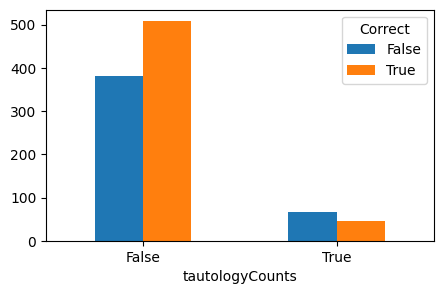

In [77]:
dfp = tautologyCounts_df.pivot_table(index='tautologyCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [78]:
17/142

0.11971830985915492

In [79]:
106/735

0.14421768707482993

In [80]:
contradictionCounts_df = pd.DataFrame()
contradictionCounts_df["contradictionCounts"] = pd.DataFrame(numContradictions)
contradictionCounts_df = contradictionCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
contradictionCounts_df["Correct"] = output_dataset['Correct']
contradictionCounts_df

,contradictionCounts,Correct
0,True,False
1,True,True
2,False,True
3,False,False
4,False,False
...,...,...
995,False,True
996,False,True
997,False,False
998,False,True


In [81]:
contradictionCounts = contradictionCounts_df.groupby(['Correct', 'contradictionCounts']).size()
contradictionCounts

Correct  contradictionCounts
False    False                  414
         True                    32
True     False                  486
         True                    68
dtype: int64

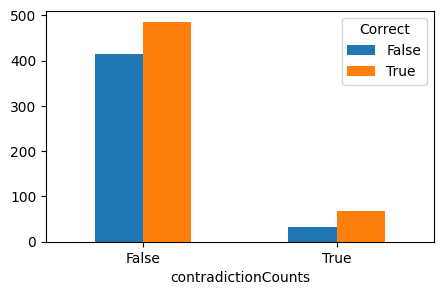

In [82]:
dfp = contradictionCounts_df.pivot_table(index='contradictionCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()